In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
from poisson1d import stiffnessMatrix1DFE, stiffnessMatrix1DFD

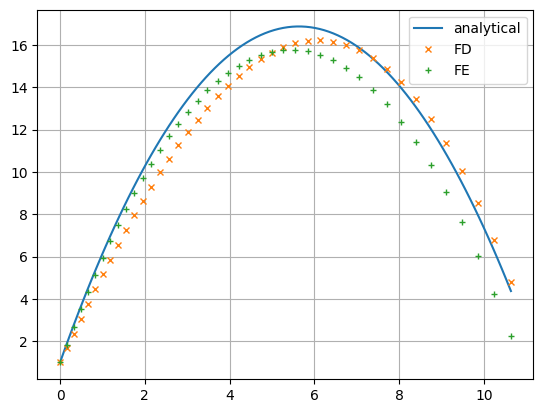

In [20]:
# x = np.linspace(0, 10, 21) # * 0.1
x = np.cumsum(np.hstack([0, np.logspace(-0.2, 0.2, 41)])) * 0.25
uL = 1
gR = -5
xx = np.linspace(x[0], x[-1], 100)
uAna = uL + (gR+x[-1]-x[0])*xx - xx**2/2
plt.plot(xx, uAna, "-", label="analytical")
AFD, bFD = stiffnessMatrix1DFD(x, uL=uL, gR=gR, f=1)
uFD = np.linalg.solve(AFD, bFD)
plt.plot(x, uFD, "x", ms=5, label="FD")
AFE, bFE = stiffnessMatrix1DFE(x, uL=uL, gR=gR, f=1)
uFE = np.linalg.solve(AFE, bFE)
plt.plot(x, uFE, "+", ms=5, label="FE")
plt.legend()
plt.grid()

In [3]:
(uFD[-1]-uFD[-2])/(x[-1]-x[-2]), (uFE[-1]-uFE[-2])/(x[-1]-x[-2]), (uAna[-1]-uAna[-2])/(xx[-1]-xx[-2])

(0.0, 0.0, 0.05050505050511836)

In [4]:
print(AFD[-1, -3:], bFD[-1])
# uFD[0], uFE[0], uAna[0]

[ 0. -4.  4.] 0.0


In [5]:
dx = np.diff(x)
b = np.zeros_like(x)
b[1:-1], dx[1:]+dx[:-1]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]))

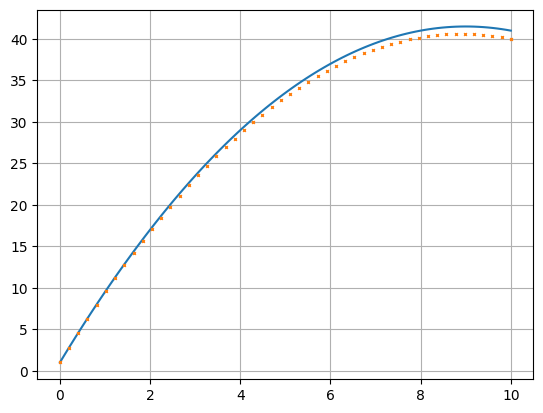

In [6]:
x = np.linspace(0, 10, 50)
uL = 1
gR = -1
A, b = stiffnessMatrix1DFD(x, uL=uL, gR=gR, f=1)
u = np.linalg.solve(A, b)
xx = np.linspace(x[0], x[-1], 100)
uAna = uL + (gR+x[-1]-x[0])*xx - xx**2/2
plt.plot(xx, uAna, "-")
plt.plot(x, u, "x")
plt.grid()

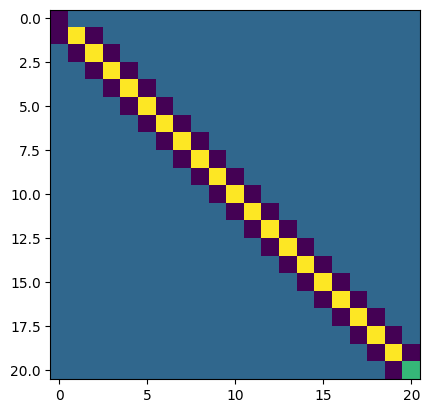

In [7]:
plt.imshow(AFE)